In [1]:
from pymopt.voxel import VoxelPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import r2_score
cp = sns.color_palette(n_colors=24)

In [2]:
from pymopt.optics import OBD
obd = OBD()

In [3]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr
def calc_alpha(nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    return alpha[:-1]

def lightIntensityDist(rez):
    nn = 100
    dr = 0.01
    p_result = rez["p"]
    v_result = rez["v"]
    w_result = rez["w"]

    Tt_index = np.where(v_result[2]>0)[0]
    Rd_index = np.where(v_result[2]<0)[0]

    _,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
    _,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)
    return Rd,Tt

In [4]:
res1 = obd.open_pklbz2_file("../result/201021_dicom4skin16_binary")
res2 = obd.open_pklbz2_file("../result/201021_dicom4skin20_binary")
res3 = obd.open_pklbz2_file("../result/201021_dicom4skin30_binary")


In [5]:

nn = 100
dr = 0.1
Rd_list = []
for i in [res1,res2,res3]:
    nPh = i['nPh']
    p_result = i['p']
    v_result = i["v"]
    w_result = i["w"]

    Tt_index = np.where(v_result[2]>0)[0]
    Rd_index = np.where(v_result[2]<0)[0]

    alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
    Rd_list.append(Rd)
    

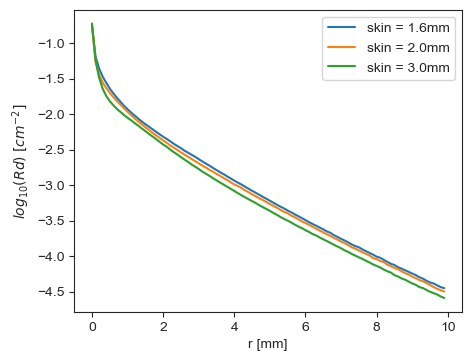

In [6]:
plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,np.log10(Rd_list[0]),'-',label = 'skin = 1.6mm')
plt.plot(alphaRd,np.log10(Rd_list[1]),'-',label = 'skin = 2.0mm')
plt.plot(alphaRd,np.log10(Rd_list[2]),'-',label = 'skin = 3.0mm')
plt.legend()
#plt.yscale('log')
plt.xlabel('r [mm]')
plt.ylabel('$log_{10}(Rd)$ $[cm^{-2}]$')
plt.show()